# The Split-Apply-Combine Paradaigm

## Flight Delays

 Which airline carriers are most likely to be delayed?
 
 Let’s look at a data set of all domestic flights that departed from
 one of the New York City airports (JFK, LaGuardia, and Newark)
 on November 16, 2013.

In [2]:
# Data URL: https://web.stanford.edu/class/datasci112//data/flights_nyc_20131116.csv

import pandas as pd
df = pd.read_csv('data/flights_nyc_20131116.csv')
df

,carrier,flight,origin,dest,dep_delay
0,US,1895,EWR,CLT,-5.0
1,UA,1014,LGA,IAH,-3.0
2,AA,2243,JFK,MIA,2.0
3,UA,303,JFK,SFO,-8.0
4,US,795,LGA,PHL,-8.0
...,...,...,...,...,...
573,B6,745,JFK,PSE,-3.0
574,B6,839,JFK,BQN,0.0
575,UA,360,EWR,PBI,NaN
576,US,1946,EWR,CLT,NaN


Mean Departure Delay: 2.05 minutes


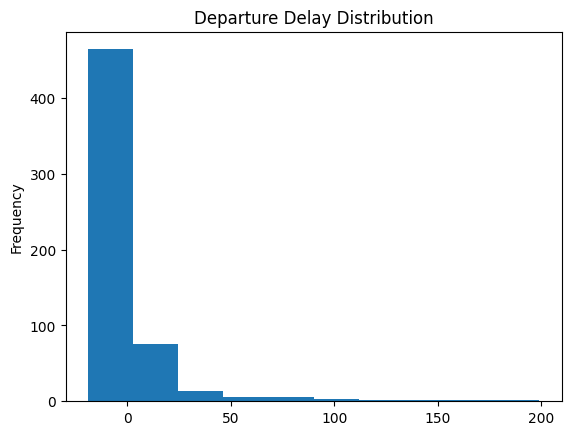

In [3]:
# visualize dep_delay
df['dep_delay'].plot(kind='hist', title='Departure Delay Distribution')
# get the mean
mean_dep_delay = df['dep_delay'].mean()
print(f'Mean Departure Delay: {mean_dep_delay:.2f} minutes')

## Boolean Masking

In [4]:
# a series of boolean values indicating whether the flight was United Airlines or not
df['carrier'] == "UA"

# the number of United flights that day
(df['carrier'] == "UA").sum()

np.int64(123)

In [5]:
# the proportion of United flights that day
proportion_ua_flights = (df['carrier'] == "UA").mean()
print(f'Proportion of United Flights: {proportion_ua_flights:.2%}')

Proportion of United Flights: 21.28%


## What You Need to Know about Booleans

- Applying a relational operator like ==, <, > and != on a `Series` produces a `Series` of booleans, by vectorization

- Arithmetic operations can be performed on booleans in `Series`, treating **True** as 1 and **False** as 0.

A boolean `Series` can be passed as a key to a DataFrame to mask the data.

In [6]:
# the dataframe with only United Airlines flights
df[df['carrier'] == 'UA']

,carrier,flight,origin,dest,dep_delay
1,UA,1014,LGA,IAH,-3.0
3,UA,303,JFK,SFO,-8.0
8,UA,1187,LGA,ORD,-5.0
9,UA,258,EWR,MCO,-2.0
15,UA,665,EWR,SFO,-1.0
...,...,...,...,...,...
537,UA,1631,EWR,IAH,-3.0
549,UA,1409,EWR,TPA,-1.0
552,UA,1071,EWR,BQN,5.0
562,UA,1066,EWR,BOS,-5.0


How would we summarize the United Airlines delays?

In [7]:
df[df['carrier'] == 'UA']['dep_delay'].mean()

np.float64(5.590163934426229)

Note that this is a summary of a conditional distribution of **dep_delay**:

$$
\mathrm{mean(dep\_delay|carrier = UA)}
$$

## Another Exercise

To compare carriers, we need to summarize all the conditional distributions of **dep_delay** given **carrier**:

$$
\mathrm{mean(dep\_delay|carrier)}
$$

In [8]:
# inconvenient solution
# and the values are not stored in a Pandas object for further analysis
for carrier in df['carrier'].unique():
    print(carrier, df[df["carrier"] == carrier]["dep_delay"].mean())

US -2.324324324324324
UA 5.590163934426229
AA -1.337837837837838
DL 3.295238095238095
B6 1.5378787878787878
EV 1.2476190476190476


## Split-Apply-Combine in Pandas

In [9]:
## The Split-Apply-Combine Paradigm
df.groupby('carrier')['dep_delay'].mean()

carrier
AA   -1.337838
B6    1.537879
DL    3.295238
EV    1.247619
UA    5.590164
US   -2.324324
Name: dep_delay, dtype: float64

<Axes: title={'center': 'Mean Departure Delay by Carrier'}, xlabel='carrier'>

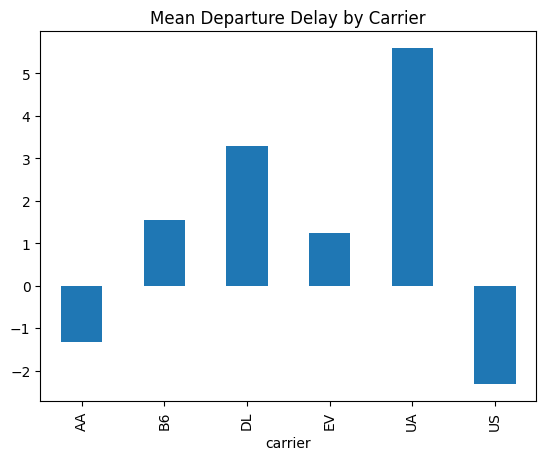

In [10]:
# visualize the mean departure delay for each carrier
# notice that UA had the highest mean departure delay
df.groupby('carrier')['dep_delay'].mean().plot(kind='bar', title='Mean Departure Delay by Carrier')

In [ ]:
# mean departure delay by carrier and origin
df.groupby(['carrier', 'origin'])['dep_delay'].mean()

carrier  origin
AA       EWR       -3.375000
         JFK        1.771429
         LGA       -4.322581
B6       EWR       -0.823529
         JFK       -0.836735
         LGA       17.588235
DL       EWR       19.222222
         JFK        4.980000
         LGA       -1.652174
EV       EWR        1.483146
         JFK        0.000000
         LGA       -0.083333
UA       EWR        7.525773
         JFK        1.909091
         LGA       -4.928571
US       EWR       -5.000000
         JFK        5.400000
         LGA       -5.312500
Name: dep_delay, dtype: float64

In [12]:
# unstack the result to get a DataFrame
mean_dep_delay_by_carrier_origin = df.groupby(['carrier', 'origin'])['dep_delay'].mean().unstack()
mean_dep_delay_by_carrier_origin

origin,EWR,JFK,LGA
carrier,,,
AA,-3.375000,1.771429,-4.322581
B6,-0.823529,-0.836735,17.588235
DL,19.222222,4.980000,-1.652174
EV,1.483146,0.000000,-0.083333
UA,7.525773,1.909091,-4.928571
US,-5.000000,5.400000,-5.312500


<Axes: title={'center': 'Mean Departure Delay by Carrier and Origin'}, xlabel='carrier'>

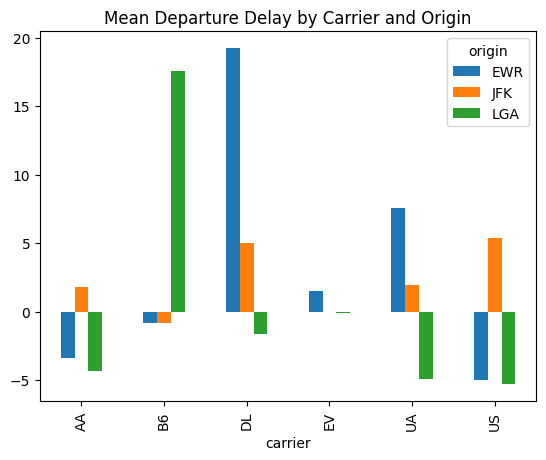

In [14]:
# visualize the mean departure delay by carrier and origin
mean_dep_delay_by_carrier_origin.plot(kind='bar', title='Mean Departure Delay by Carrier and Origin')

## Comparing Distributions

Text(0.5, 0, 'Departure Delay')

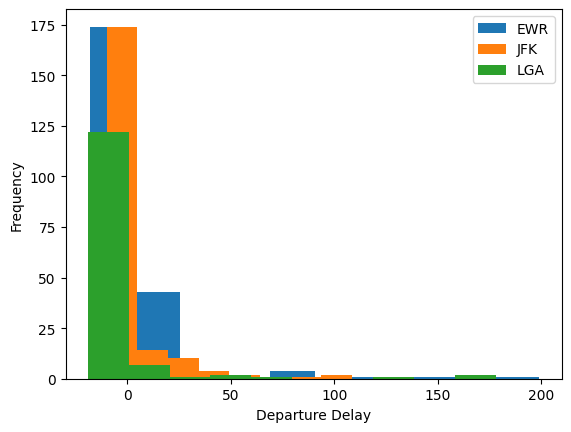

In [19]:
axes = df.groupby('origin')['dep_delay'].plot(kind='hist', legend=True)
axes.iloc[0].set_xlabel('Departure Delay')

To prevent _overplotting_, we set the opacity parameter **alpha**.

Text(0.5, 0, 'Departure Delay')

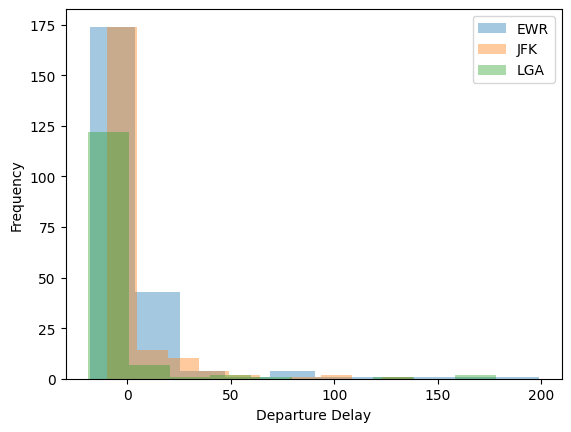

In [20]:
axes = df.groupby('origin')['dep_delay'].plot(kind='hist', legend=True, alpha=0.4)
axes.iloc[0].set_xlabel('Departure Delay')

Text(0.5, 0, 'Departure Delay')

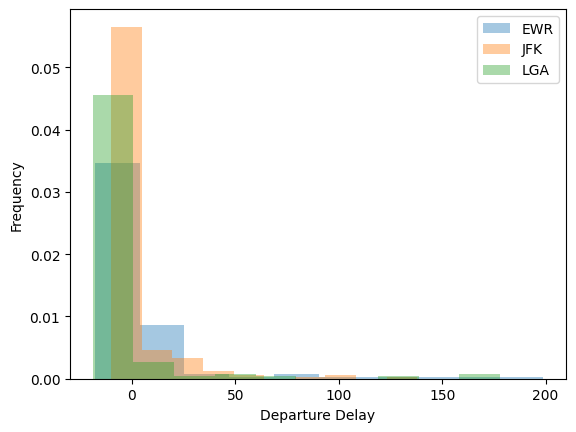

In [ ]:
# density histograms to compare conditional distributions
axes = df.groupby('origin')['dep_delay'].plot(kind='hist', legend=True, alpha=0.4, density=True)
axes.iloc[0].set_xlabel('Departure Delay')